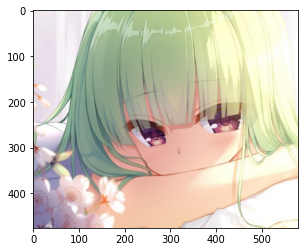

In [9]:
import cv2
import matplotlib.pyplot as plot
import torchvision.transforms as transforms
import numpy as np
import PIL.Image as Image
import torch

#经典只用plt读取（ndarray），plt显示
# img=plot.imread("murasame.jpg")
# plot.imshow(img)
# plot.show()

#经典cv2读取(ndarray)，matplotlib显示.(cv2不适合展示)
# img = cv2.imread('./murasame.jpg', 1)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plot.imshow(img)
# plot.show()

#非经典PIL读取(PIL类型)，matplotlib显示（pil不适合展示）
img=Image.open("murasame.jpg")
plot.imshow(img)
plot.show()

# # cv2->hwc pytorch->chw pil->hwc
img_torch=transforms.ToTensor()(img)
# img_torch=torch.tensor(np.asarray(img).transpose(2,0,1))

## 各种变换！！！

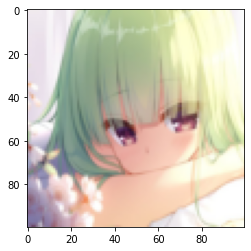

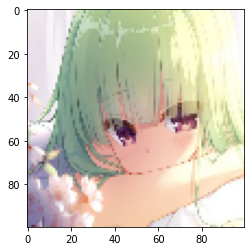

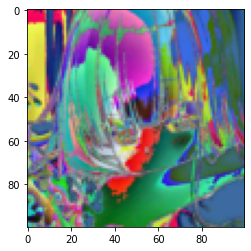

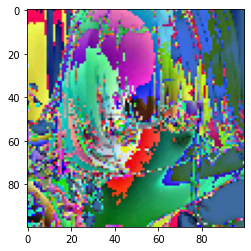

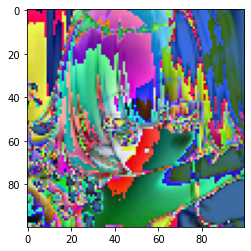

In [36]:
#transforms的输入可以为pil或者tensor，但是实验发现似乎只有pil才会正确插值。。即使存到本地也是前者清晰。实验证明pil和tensor互相转换不会任何损失精度，问题出在他不会给tensor插值。
#一般代码里会组合一堆变换，头一个就是totensor,我觉得不是很好，因为transform对PIL的支持远好过tensor。但是Normalize就只能读取tensor，下面的RandomErasing也是只能tensor。。
new_img0 = transforms.Resize((100,100))(img)
plot.imshow(new_img0)
plot.show()


new_img1 = transforms.Resize((100,100))(img_torch)
plot.imshow(transforms.ToPILImage()(new_img1))
plot.show()

#我认为一个可以的是先变成tensor再normalize再变回PIL再进行其他变形。这样变回PIL仍能正确插值。。
#但这个可能插值后又不是标准正态分布了。所以都是玄学，可能第三个比较好点
transform=transforms.Compose([
    transforms.ToTensor(),
    #三通道mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]这个是imagenet上抽样计算出来的，不是动漫风格的
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), #这个必须接受（0，1）区间的tensor。大概就是搞成标准正太(x-miu/theta)，也即是归一，防止震荡，加快训练
    transforms.ToPILImage(),
    transforms.Resize((100,100))
])
new_img=transform(img)
plot.imshow(new_img)
plot.show()

# 这个是不正确做法。其实也无所谓，都是玄学
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((100,100)), #这个和normal谁先谁后效果一样，应该都能保证标准正态。
    transforms.ToPILImage(),
])
new_img=transform(img)
plot.imshow(new_img)
plot.show()

#正确做法!!，我可以先干别的再归一化.反正最后都得变成tensor
#陈杰医学课那个代码就是这么干的！
transform=transforms.Compose([
    transforms.Resize((100,100)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),   
    transforms.ToPILImage(),
])
new_img=transform(img)
plot.imshow(new_img)
plot.show()

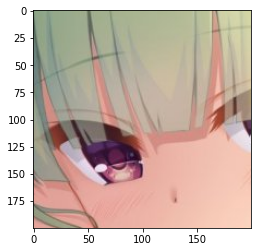

In [199]:
#只要中间200x200像素
new_img=transforms.CenterCrop(200)(img)
plot.imshow(new_img)
plot.show()

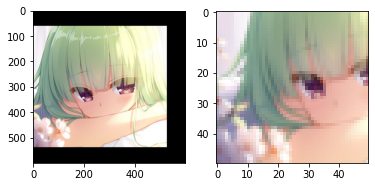

In [281]:
#同上，随机中心剪裁，也可以多加参数
new_img=transforms.RandomCrop((600,600),padding=100)(img)
new_img2=transforms.RandomResizedCrop(size=(50,50),scale=(0.5,2),ratio=(0.5,2))(img)
plot.subplot(121)
plot.imshow()
plot.subplot(122)
plot.imshow(new_img2)
plot.show()

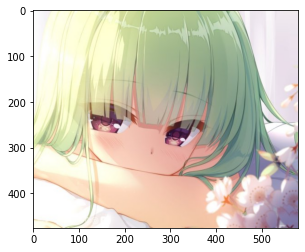

In [207]:
#默认随机反转概率0.5
new_img=transforms.RandomHorizontalFlip(p=0.6)(img)
plot.imshow(new_img)
plot.show()

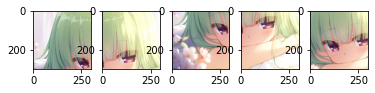

In [165]:
new_img,aa,bb,cc,dd=transforms.FiveCrop(300)(img)
plot.subplot(151);plot.imshow(new_img)
plot.subplot(152);plot.imshow(aa)
plot.subplot(153);plot.imshow(bb)
plot.subplot(154);plot.imshow(cc)
plot.subplot(155);plot.imshow(dd)
plot.show()

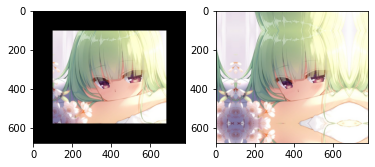

In [17]:
new_img=transforms.Pad(padding=100)(img)
new_img1=transforms.Pad(padding=100,padding_mode='reflect')(img)
plot.subplot(121);plot.imshow(new_img)
plot.subplot(122);plot.imshow(new_img1)
plot.show()

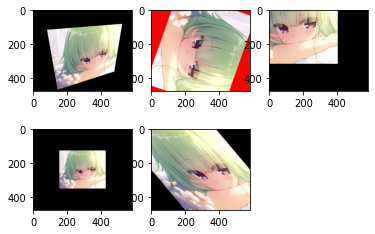

In [244]:
#随机投影，并且发生的概率为0.5，默认NEAREST插值
new_img=transforms.RandomPerspective(distortion_scale=0.5,p=0.5)(img)
# 随即仿射，角度只是随机的范围-180 180
new_img1=transforms.RandomAffine(degrees=180,fillcolor="red")(img)
new_img2=transforms.RandomAffine(degrees=0,translate=(0.5,0.5))(img) #在0.5*w,0.5*h内随机平移
new_img3=transforms.RandomAffine(degrees=0,scale=(0.1,1))(img) #在0.5,1内随机缩放
new_img4=transforms.RandomAffine(degrees=0,shear=50)(img) #-50度到50度之间shear
plot.subplot(231);plot.imshow(new_img)
plot.subplot(232);plot.imshow()
plot.subplot(233);plot.imshow(new_img2)
plot.subplot(234);plot.imshow(new_img3)
plot.subplot(235);plot.imshow(new_img4)
plot.show()

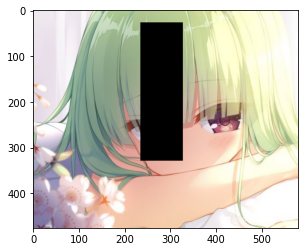

In [297]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=1),
    transforms.ToPILImage()
])
new_img=transform(img)
plot.imshow(new_img)
plot.show()

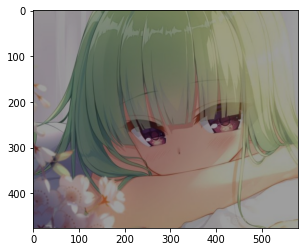

In [264]:
#hsv颜色空间，(min,max)
new_img=transforms.ColorJitter(brightness=[0.5,1.5])(img)
plot.imshow(new_img)
plot.show()

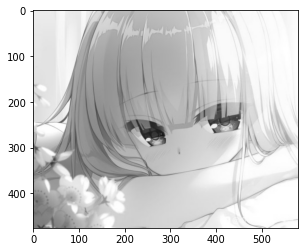

In [301]:
new_img=transforms.RandomGrayscale(p=1)(img)
plot.imshow(new_img)
plot.show()

## 最后，一般分类里面可以直接增强；而目标检测任务里对标签也要增强！（一般要手写了）
## 医学那个是仿照torchvision，图像一份标签图像一份手写的
## FSCS那个没有变换